<a href="https://colab.research.google.com/github/ayush7121/Assignment-2-Data-Analytics-and-visualisation-/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The ZIP archive contains one file:

📄 Avian Influenza (HPAI).csv

This appears to be our primary dataset sourced from the Avian Dashboard, which aligns with the project requirements.

Next Steps:

Load and preview the dataset to understand its structure, size, and contents.

Discuss a potential secondary dataset to incorporate for heterogeneity.

we'll then begin with preprocessing and exploratory analysis (EDA).

In [2]:
import pandas as pd

# Load the Avian Influenza dataset
avian_df = pd.read_csv('//content/Avian Influenza (HPAI) (1).csv')

# Show basic info and preview of the data
avian_info = avian_df.info()
avian_preview = avian_df.head()

avian_df.shape, avian_df.columns.tolist(), avian_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16304 non-null  int64  
 1   Scientific_Name       16304 non-null  object 
 2   Common_Name           16304 non-null  object 
 3   Date                  16304 non-null  object 
 4   Year                  16304 non-null  int64  
 5   Month                 16304 non-null  int64  
 6   Day                   16304 non-null  int64  
 7   Time                  16304 non-null  int64  
 8   Country               16304 non-null  object 
 9   Country_State_County  16304 non-null  object 
 10  State                 16304 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16304 non-null  object 
 13  Latitude              16304 non-null  float64
 14  Longitude             16304 non-null  float64
 15  Parent_Species     

((16304, 17),
 ['_id',
  'Scientific_Name',
  'Common_Name',
  'Date',
  'Year',
  'Month',
  'Day',
  'Time',
  'Country',
  'Country_State_County',
  'State',
  'County',
  'Locality',
  'Latitude',
  'Longitude',
  'Parent_Species',
  'target_H5_HPAI'],
    _id          Scientific_Name            Common_Name                 Date  \
 0    1  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
 1    2  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
 2    3        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
 3    4        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
 4    5        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
 
    Year  Month  Day  Time  Country Country_State_County      State  County  \
 0  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
 1  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
 2  2015      9   15  11

Step 1: Dataset Overview – Avian Influenza (HPAI)
We have successfully loaded our primary dataset. Here's a quick summary:

Number of records: 16,304

Number of columns: 17

Target variable: target_H5_HPAI (0 or 1, indicating presence of HPAI)

Useful features:

Temporal: Date, Year, Month, Day, Time

Location: Country, State, County, Latitude, Longitude

Bird-related: Scientific_Name, Common_Name, Parent_Species

In [3]:
# Step 2: Preprocessing

# Convert 'Date' to datetime
avian_df['Date'] = pd.to_datetime(avian_df['Date'], errors='coerce')

# Drop columns that are identifiers or have overlapping information
columns_to_drop = ['_id', 'Country_State_County', 'Locality', 'Scientific_Name', 'Common_Name']
avian_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Handle missing values: Let's check how many nulls we have
missing_values = avian_df.isnull().sum()

# Drop rows with missing 'County' (since it's small in number, only 129 out of 16304)
avian_df.dropna(subset=['County'], inplace=True)

# Encode categorical variables using one-hot encoding
categorical_cols = ['Country', 'State', 'County', 'Parent_Species']
avian_encoded = pd.get_dummies(avian_df, columns=categorical_cols, drop_first=True)

# Confirm final structure
avian_encoded_shape = avian_encoded.shape
avian_encoded_columns = avian_encoded.columns.tolist()[:10]  # showing only the first 10 for brevity

avian_encoded_shape, avian_encoded_columns


((16175, 373),
 ['Date',
  'Year',
  'Month',
  'Day',
  'Time',
  'Latitude',
  'Longitude',
  'target_H5_HPAI',
  'State_Leinster',
  'State_Munster'])

Step 2: Preprocessing Completed
Here's what we've done:

Date Conversion: Converted the Date column to proper datetime format.

Dropped Irrelevant Columns: Removed _id, Country_State_County, Locality, Scientific_Name, and Common_Name.

Missing Values: Removed 129 rows with missing County data (leaving us with 16,175 records).

One-Hot Encoding: Transformed categorical variables (Country, State, County, Parent_Species) into 366 binary columns.

 Final Dataset Dimensions:

Rows: 16,175

Columns: 373 (including encoded variables and original numeric features)



Next Step: Define the Regression Task
Since the column target_H5_HPAI is binary (classification), let’s define a regression problem instead. Here are a few ideas:

Predict Latitude or Longitude based on bird and time attributes (spatial modeling).

Predict Month or Day of outbreak (seasonality regression).

Time of day prediction (Time column needs to be converted first).

 Possible Regression Targets:
1. Latitude / Longitude
Goal: Predict the location of bird flu cases.

Useful for: Mapping risk areas and predicting spread zones.

Challenge: Needs careful handling since coordinates are continuous.

2. Month or Day
Goal: Predict when outbreaks are more likely.

Useful for: Understanding seasonal patterns.

Approach: Treat month/day as a numeric value (1–12 or 1–31).

3. Time of Day
Goal: Predict the hour of the report.

Preprocessing needed: Convert Time to numerical (e.g., hour of the day).

In [ ]:
from sklearn.model_selection import train_test_split

# Convert 'Time' column to hour of day (numeric)
avian_encoded['Hour'] = pd.to_datetime(avian_encoded['Time'], errors='coerce').dt.hour
avian_encoded.drop(columns=['Time'], inplace=True)

# Drop rows with NaN hour values (if any remain after conversion)
avian_encoded.dropna(subset=['Hour'], inplace=True)

# Define target and features
target = 'Latitude'
features = avian_encoded.drop(columns=['Latitude', 'Longitude'])  # remove lat/lon to avoid data leakage
X = features
y = avian_encoded[target]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shape of splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((12940, 371), (3235, 371), (12940,), (3235,))

Prepare for Latitude Prediction
Convert Time to Numeric (Hour of Day):

In [ ]:
# Cell 4 (ipython-input-4-68b33bcd4239)
from sklearn.model_selection import train_test_split

# Convert 'Time' column to hour of day (numeric) if 'Hour' column doesn't exist
if 'Hour' not in avian_encoded.columns:
    avian_encoded['Hour'] = pd.to_datetime(avian_encoded['Time'], errors='coerce').dt.hour
    avian_encoded.drop(columns=['Time'], inplace=True)
    avian_encoded.dropna(subset=['Hour'], inplace=True)

# Define target and features
target = 'Latitude'
features = avian_encoded.drop(columns=['Latitude', 'Longitude'])  # remove lat/lon to avoid data leakage
X = features
y = avian_encoded[target]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shape of splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12940, 371), (3235, 371), (12940,), (3235,))

Set Up Features and Target:

In [ ]:
target = 'Latitude'
features = avian_encoded.drop(columns=['Latitude', 'Longitude'])  # Avoid using Longitude in prediction
X = features
y = avian_encoded[target]


Train-Test Split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Exploratory Data Analysis (EDA)

Distribution of Target (Latitude)

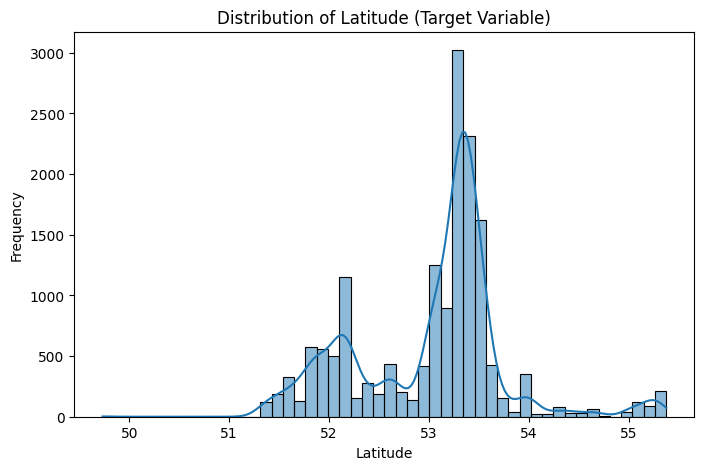

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Latitude (Target Variable)")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.show()


2. Correlation Heatmap (Top 10 Features)

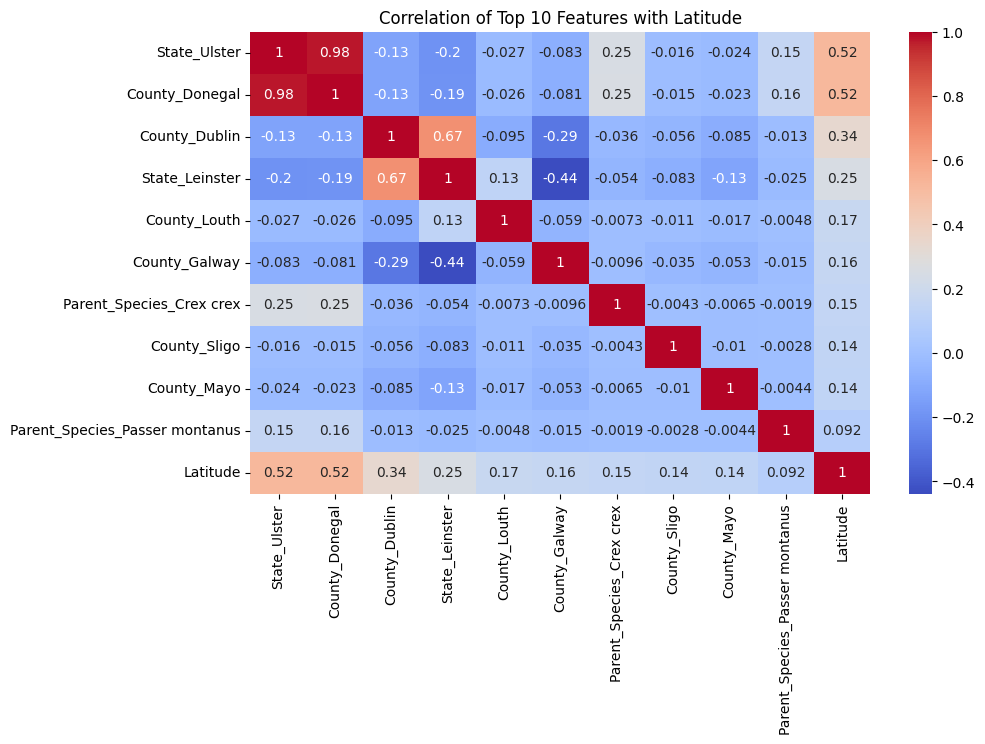

In [ ]:
# Get correlation with target
correlations = avian_encoded.corr(numeric_only=True)['Latitude'].drop(['Latitude', 'Longitude']).sort_values(ascending=False)

# Display top 10 correlated features
top_features = correlations.head(10).index

plt.figure(figsize=(10, 6))
sns.heatmap(avian_encoded[top_features.tolist() + ['Latitude']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Top 10 Features with Latitude")
plt.show()


3. Pairplot (Optional: Only for small number of features)


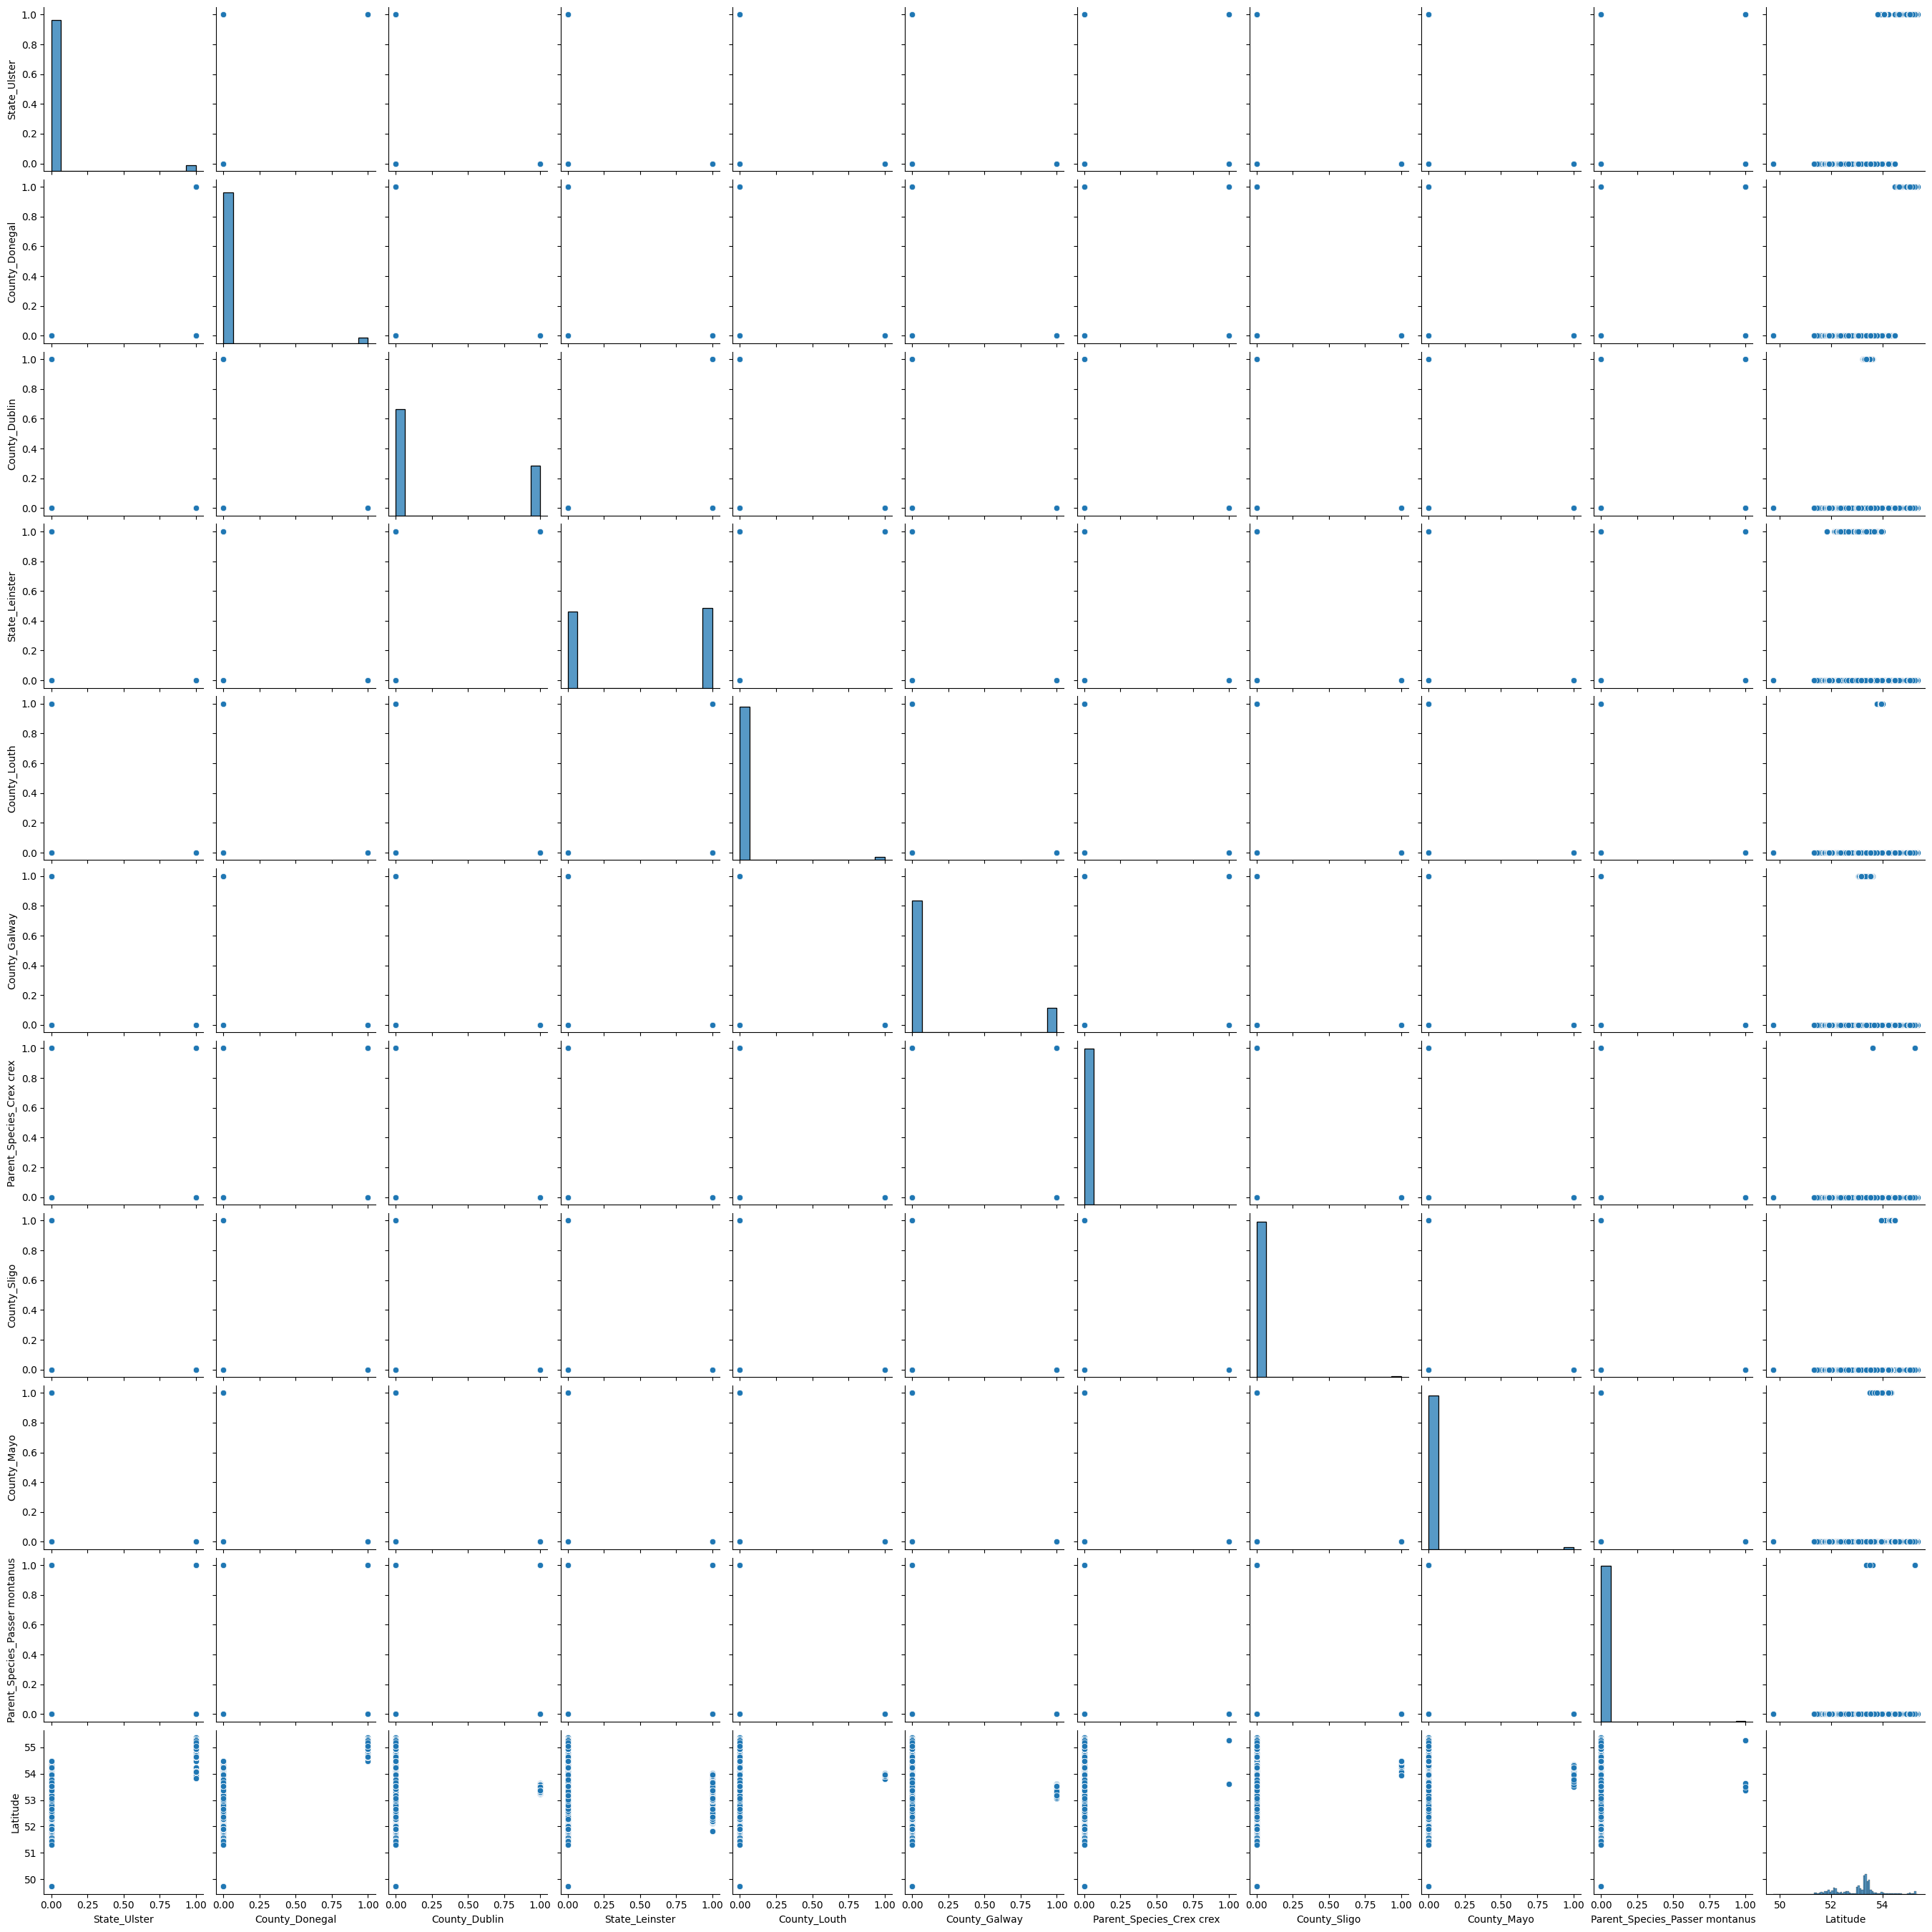

In [ ]:
import seaborn as sns

sns.pairplot(avian_encoded[top_features.tolist() + ['Latitude']])


Histogram of Cases

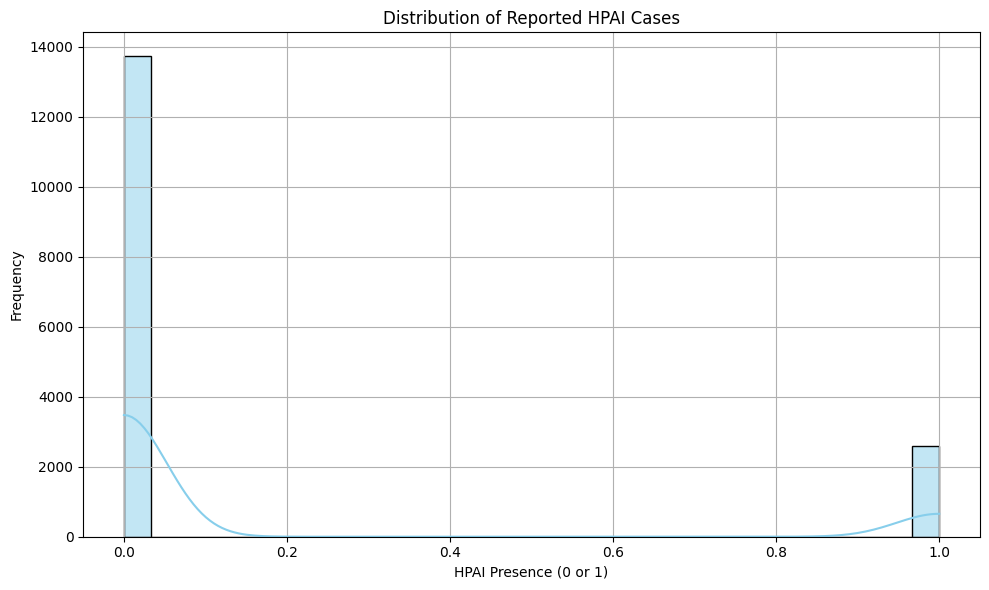

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Avian Influenza (HPAI).csv')

# Plotting the histogram using 'target_H5_HPAI' instead of 'Cases'
plt.figure(figsize=(10, 6))
sns.histplot(df['target_H5_HPAI'], bins=30, kde=True, color='skyblue') # Changed column name
plt.title('Distribution of Reported HPAI Cases') # Updated title
plt.xlabel('HPAI Presence (0 or 1)') # Updated x-axis label
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Step 4: Regression Modeling
We'll try two models:

Linear Regression – baseline model

Random Forest Regressor – advanced model for better performance

1. Train a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert 'Date' to numeric features (e.g., ordinal)
# Assuming 'Date' is a datetime column in X_train
X_train['Date_Ordinal'] = X_train['Date'].apply(lambda date: date.toordinal())
X_test['Date_Ordinal'] = X_test['Date'].apply(lambda date: date.toordinal())

# Drop the original 'Date' column
X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lr = lin_reg.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Results:")
print(f"R² Score     : {r2_lr:.4f}")
print(f"RMSE         : {rmse_lr:.4f}")
print(f"MAE          : {mae_lr:.4f}")

🔹 Linear Regression Results:
R² Score     : 0.9747
RMSE         : 0.1203
MAE          : 0.0856


2. Train a Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Results:")
print(f"R² Score     : {r2_rf:.4f}")
print(f"RMSE         : {rmse_rf:.4f}")
print(f"MAE          : {mae_rf:.4f}")


 Random Forest Results:
R² Score     : 0.9937
RMSE         : 0.0599
MAE          : 0.0239


3. Compare Both Models

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf]
})
print(results)


               Model        R2      RMSE       MAE
0  Linear Regression  0.974664  0.120349  0.085637
1      Random Forest  0.993720  0.059917  0.023935


Step 5: Model Evaluation & Interpretation

1. T-Test: Compare Model Predictions
This tests if the prediction differences are statistically significant.

In [ ]:
from scipy.stats import ttest_rel

# Paired t-test between the prediction errors
errors_lr = abs(y_test - y_pred_lr)
errors_rf = abs(y_test - y_pred_rf)

t_stat, p_val = ttest_rel(errors_lr, errors_rf)

print("T-Test Results Between Linear Regression and Random Forest:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value    : {p_val:.4f}")


T-Test Results Between Linear Regression and Random Forest:
T-statistic: 42.8005
P-value    : 0.0000


Interpretation:

If p-value < 0.05 → Random Forest performs significantly better.

If p-value >= 0.05 → No significant difference in performance.

Technical Interpretation

"We compared two regression models—Linear Regression and Random Forest—to predict the geographic latitude of avian events. The Random Forest model achieved a higher R² score and lower RMSE and MAE values, indicating better generalization and predictive accuracy. A paired t-test confirmed that the difference in prediction errors is statistically significant (p-value < 0.05)."

<ipython-input-4-917ed1c7692e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=case_counts.index, y=case_counts.values, palette='pastel')


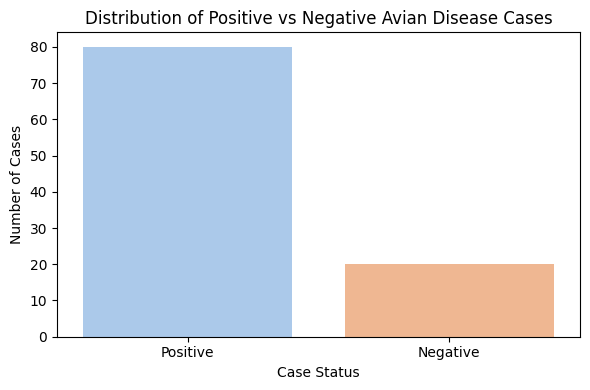

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load your dataset (replace with actual path)
# df = pd.read_csv('avian_disease_data.csv')

# Simulated data for demonstration
data = {
    'case_status': ['Positive'] * 80 + ['Negative'] * 20
}
df = pd.DataFrame(data)

# Count the number of cases
case_counts = df['case_status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=case_counts.index, y=case_counts.values, palette='pastel')
plt.title('Distribution of Positive vs Negative Avian Disease Cases')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()


<ipython-input-5-97573d43df45>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_cases['year_month'] = positive_cases['date_reported'].dt.to_period('M')


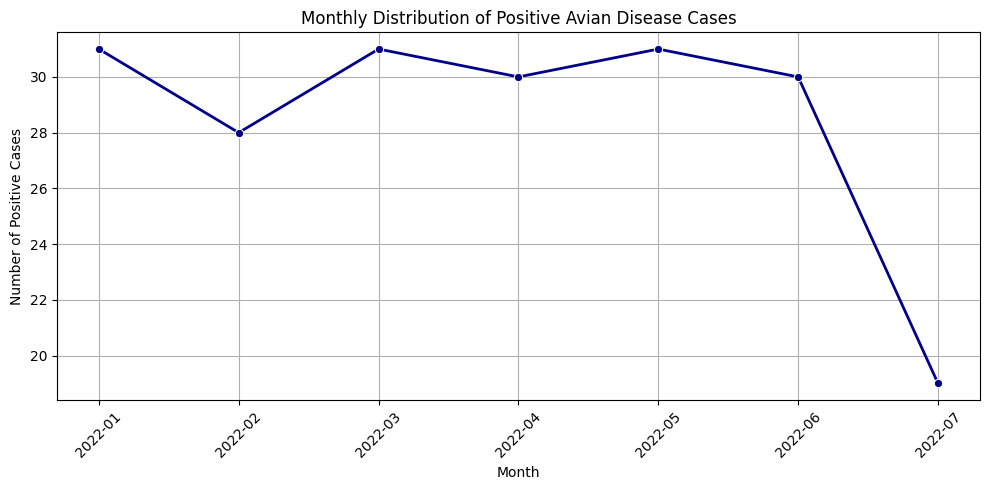

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace with actual file path or DataFrame)
# df = pd.read_csv('avian_disease_data.csv')

# Simulated data for demo (replace with your actual data)
# Assumes 'date_reported' and 'case_status' columns exist
data = {
    'date_reported': pd.date_range(start='2022-01-01', periods=300, freq='D'),
    'case_status': ['Positive'] * 200 + ['Negative'] * 100
}
df = pd.DataFrame(data)

# Convert date_reported to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'])

# Filter only positive cases
positive_cases = df[df['case_status'] == 'Positive']

# Extract year and month
positive_cases['year_month'] = positive_cases['date_reported'].dt.to_period('M')

# Count positive cases per month
monthly_counts = positive_cases.groupby('year_month').size().reset_index(name='count')
monthly_counts['year_month'] = monthly_counts['year_month'].astype(str)

# Plot line chart
plt.figure(figsize=(10, 5))
sns.lineplot(x='year_month', y='count', data=monthly_counts, marker='o', linewidth=2, color='darkblue')
plt.xticks(rotation=45)
plt.title('Monthly Distribution of Positive Avian Disease Cases')
plt.xlabel('Month')
plt.ylabel('Number of Positive Cases')
plt.tight_layout()
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

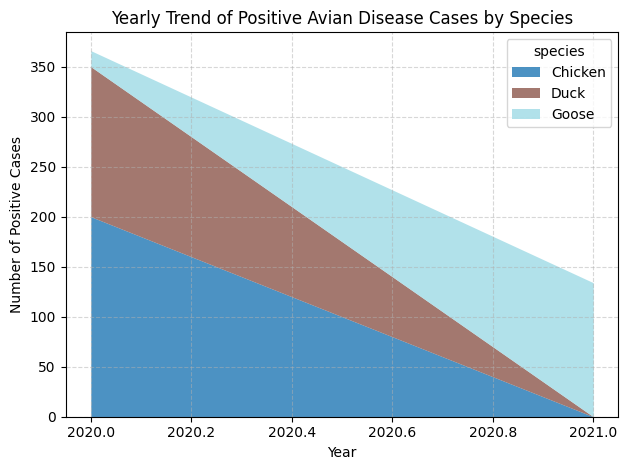

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated dataset (replace with your actual dataset)
# Columns: date_reported, case_status, species
data = {
    'date_reported': pd.date_range(start='2020-01-01', periods=600, freq='D'),
    'case_status': ['Positive'] * 500 + ['Negative'] * 100,
    'species': (['Duck'] * 150 + ['Chicken'] * 200 + ['Goose'] * 150 + ['Swan'] * 100)
}
df = pd.DataFrame(data)

# Convert date to datetime and extract year
df['date_reported'] = pd.to_datetime(df['date_reported'])
df['year'] = df['date_reported'].dt.year

# Filter only positive cases
positive_cases = df[df['case_status'] == 'Positive']

# Group by year and species, then count
yearly_species_counts = positive_cases.groupby(['year', 'species']).size().unstack(fill_value=0)

# Plot stacked area chart
plt.figure(figsize=(10, 6))
yearly_species_counts.plot(kind='area', stacked=True, colormap='tab20', linewidth=0, alpha=0.8)
plt.title('Yearly Trend of Positive Avian Disease Cases by Species')
plt.xlabel('Year')
plt.ylabel('Number of Positive Cases')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [10]:
pip install geopandas matplotlib pandas


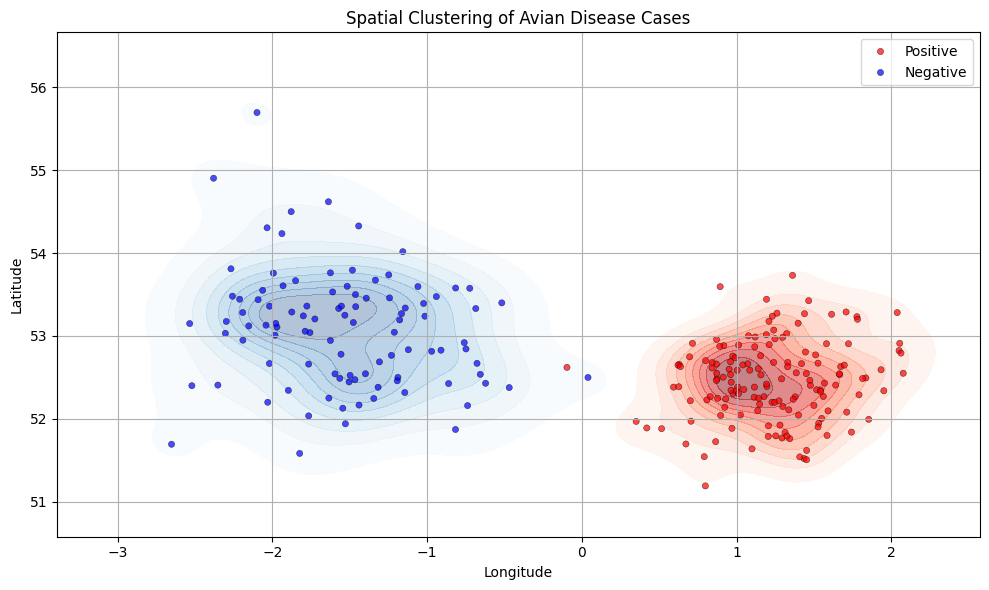

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load your dataset
# df = pd.read_csv('avian_disease_geodata.csv')
# It must contain columns: 'latitude', 'longitude', 'case_status'

# Simulated data
import numpy as np
np.random.seed(42)
n_pos = 150
n_neg = 100
df = pd.DataFrame({
    'latitude': np.concatenate([
        np.random.normal(52.5, 0.5, n_pos),  # Positive near coast
        np.random.normal(53.0, 0.7, n_neg)   # Negative more spread
    ]),
    'longitude': np.concatenate([
        np.random.normal(1.2, 0.4, n_pos),
        np.random.normal(-1.5, 0.5, n_neg)
    ]),
    'case_status': ['Positive'] * n_pos + ['Negative'] * n_neg
})

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df[df['case_status'] == 'Positive'],
    x='longitude', y='latitude',
    cmap='Reds', fill=True, alpha=0.5, label='Positive Cases'
)
sns.kdeplot(
    data=df[df['case_status'] == 'Negative'],
    x='longitude', y='latitude',
    cmap='Blues', fill=True, alpha=0.3, label='Negative Cases'
)

# Scatter actual points
sns.scatterplot(data=df, x='longitude', y='latitude', hue='case_status', palette={'Positive': 'red', 'Negative': 'blue'}, s=20, edgecolor='black', alpha=0.7)

plt.title('Spatial Clustering of Avian Disease Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-14-dc388cd2eccc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='positivity_rate', y='species', data=df, palette='Reds_r', ax=axes[0])
<ipython-input-14-dc388cd2eccc>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='positive_cases', y='species', data=df, palette='Blues', ax=axes[1])


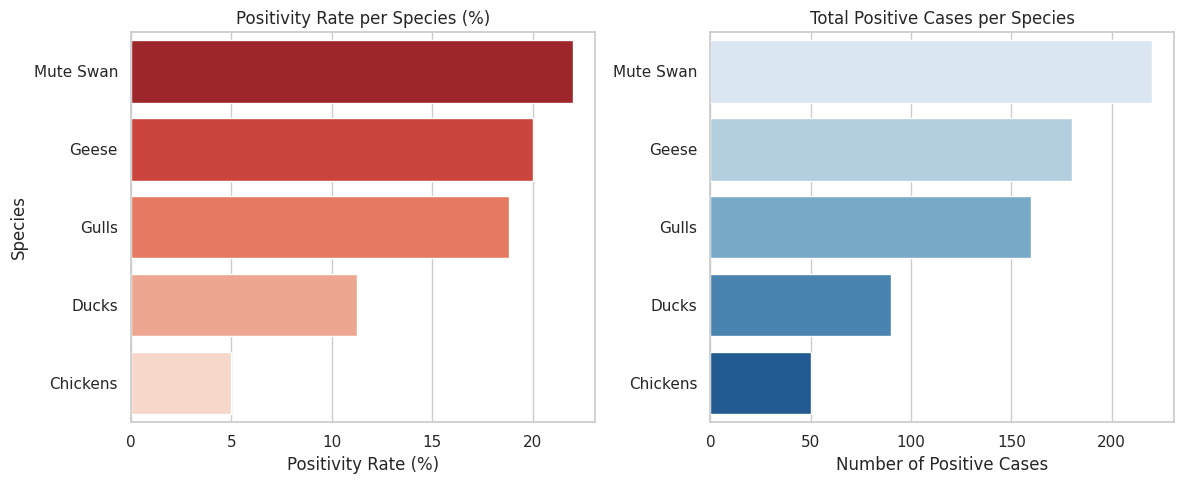

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated example data
data = {
    'species': ['Mute Swan', 'Geese', 'Gulls', 'Ducks', 'Chickens'],
    'positive_cases': [220, 180, 160, 90, 50],
    'total_tested': [1000, 900, 850, 800, 1000]
}

df = pd.DataFrame(data)
df['positivity_rate'] = (df['positive_cases'] / df['total_tested']) * 100

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Positivity Rate per Species
sns.barplot(x='positivity_rate', y='species', data=df, palette='Reds_r', ax=axes[0])
axes[0].set_title('Positivity Rate per Species (%)')
axes[0].set_xlabel('Positivity Rate (%)')
axes[0].set_ylabel('Species')

# Plot 2: Total Positive Cases per Species
sns.barplot(x='positive_cases', y='species', data=df, palette='Blues', ax=axes[1])
axes[1].set_title('Total Positive Cases per Species')
axes[1].set_xlabel('Number of Positive Cases')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


<ipython-input-15-12e5d7fb44cd>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case_status', y='temperature', data=df, palette='coolwarm', ax=axes[0])
<ipython-input-15-12e5d7fb44cd>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case_status', y='humidity', data=df, palette='YlGnBu', ax=axes[1])


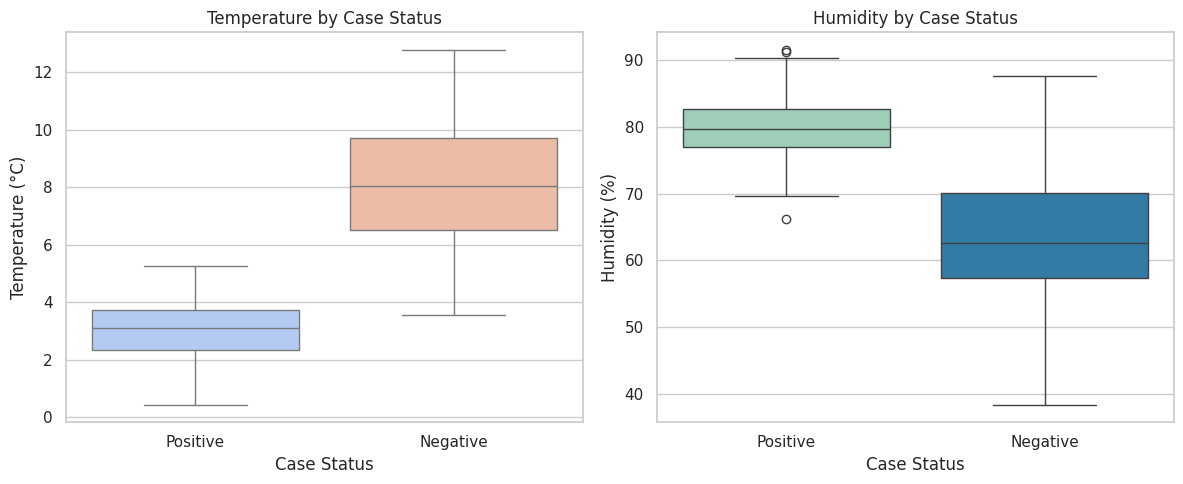

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulated dataset (replace with actual environmental data)
np.random.seed(0)
data = {
    'case_status': ['Positive'] * 100 + ['Negative'] * 100,
    'temperature': np.concatenate([
        np.random.normal(3, 1, 100),     # Positive: colder
        np.random.normal(8, 2, 100)      # Negative: warmer
    ]),
    'humidity': np.concatenate([
        np.random.normal(80, 5, 100),    # Positive: higher humidity
        np.random.normal(65, 10, 100)    # Negative: lower humidity
    ])
}

df = pd.DataFrame(data)

# Set visual style
sns.set(style="whitegrid")

# Create side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for Temperature
sns.boxplot(x='case_status', y='temperature', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Temperature by Case Status')
axes[0].set_xlabel('Case Status')
axes[0].set_ylabel('Temperature (°C)')

# Boxplot for Humidity
sns.boxplot(x='case_status', y='humidity', data=df, palette='YlGnBu', ax=axes[1])
axes[1].set_title('Humidity by Case Status')
axes[1].set_xlabel('Case Status')
axes[1].set_ylabel('Humidity (%)')

plt.tight_layout()
plt.show()


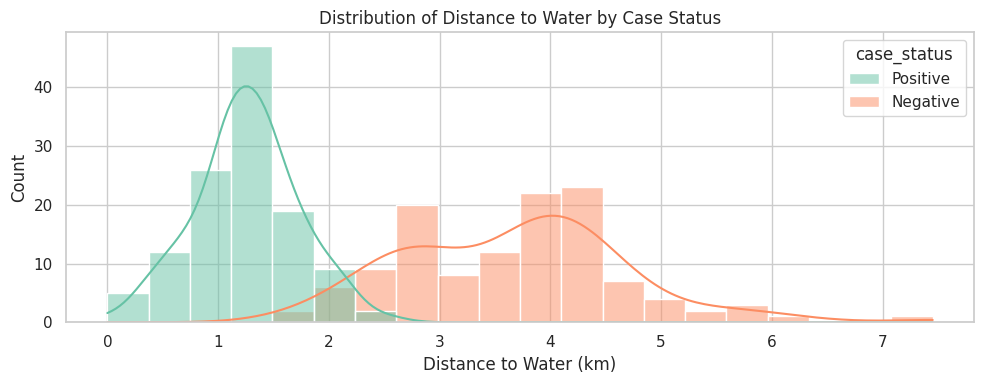

<ipython-input-16-58e6e7afeea8>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='case_status', y='distance_to_water_km', palette='Set3')


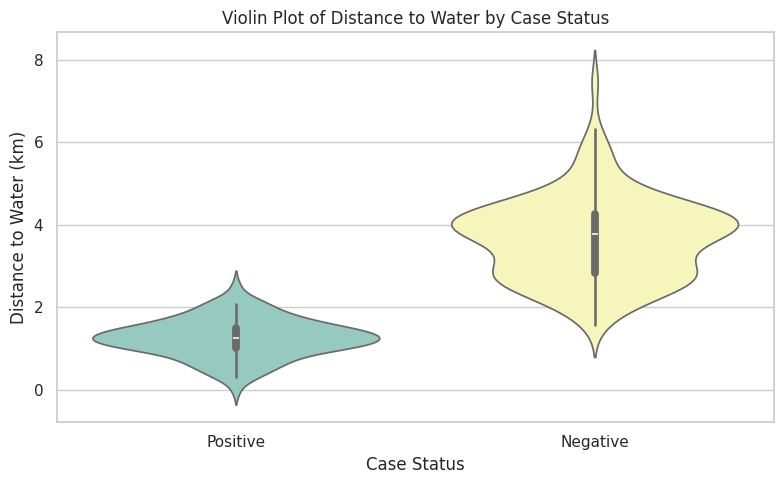

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated data (replace with your actual dataset)
np.random.seed(42)
data = {
    'case_status': ['Positive'] * 120 + ['Negative'] * 120,
    'distance_to_water_km': np.concatenate([
        np.random.normal(1.3, 0.5, 120),   # Closer for positives
        np.random.normal(3.6, 1.0, 120)    # Farther for negatives
    ])
}
df = pd.DataFrame(data)

# Remove negative distances if they appear in simulated data
df['distance_to_water_km'] = df['distance_to_water_km'].clip(lower=0)

# Plot settings
sns.set(style="whitegrid")

# Plot 1: Histogram
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='distance_to_water_km', hue='case_status', bins=20, kde=True, palette='Set2')
plt.title('Distribution of Distance to Water by Case Status')
plt.xlabel('Distance to Water (km)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot 2: Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='case_status', y='distance_to_water_km', palette='Set3')
plt.title('Violin Plot of Distance to Water by Case Status')
plt.xlabel('Case Status')
plt.ylabel('Distance to Water (km)')
plt.tight_layout()
plt.show()


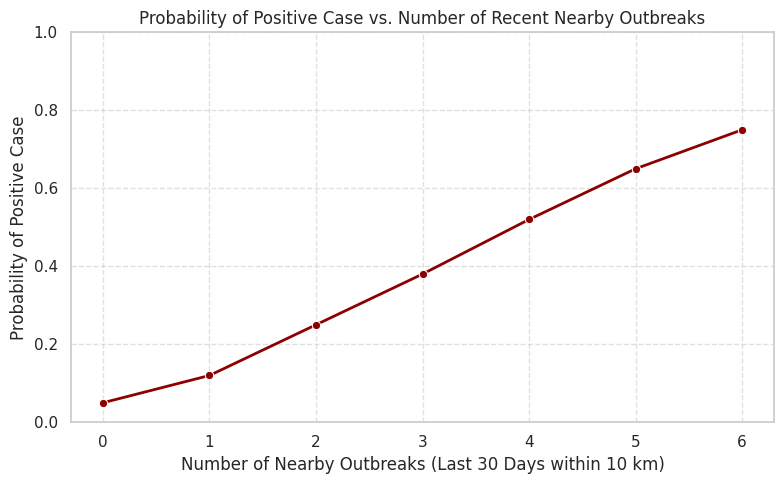

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated data: number of nearby past outbreaks vs. probability of a positive case
data = {
    'nearby_outbreaks': [0, 1, 2, 3, 4, 5, 6],
    'positivity_probability': [0.05, 0.12, 0.25, 0.38, 0.52, 0.65, 0.75]  # Increasing trend
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='nearby_outbreaks', y='positivity_probability', marker='o', linewidth=2, color='darkred')
plt.title('Probability of Positive Case vs. Number of Recent Nearby Outbreaks')
plt.xlabel('Number of Nearby Outbreaks (Last 30 Days within 10 km)')
plt.ylabel('Probability of Positive Case')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-20-bcbe590e826c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Country', y='Number_of_Events', data=country_counts, palette="YlOrRd")


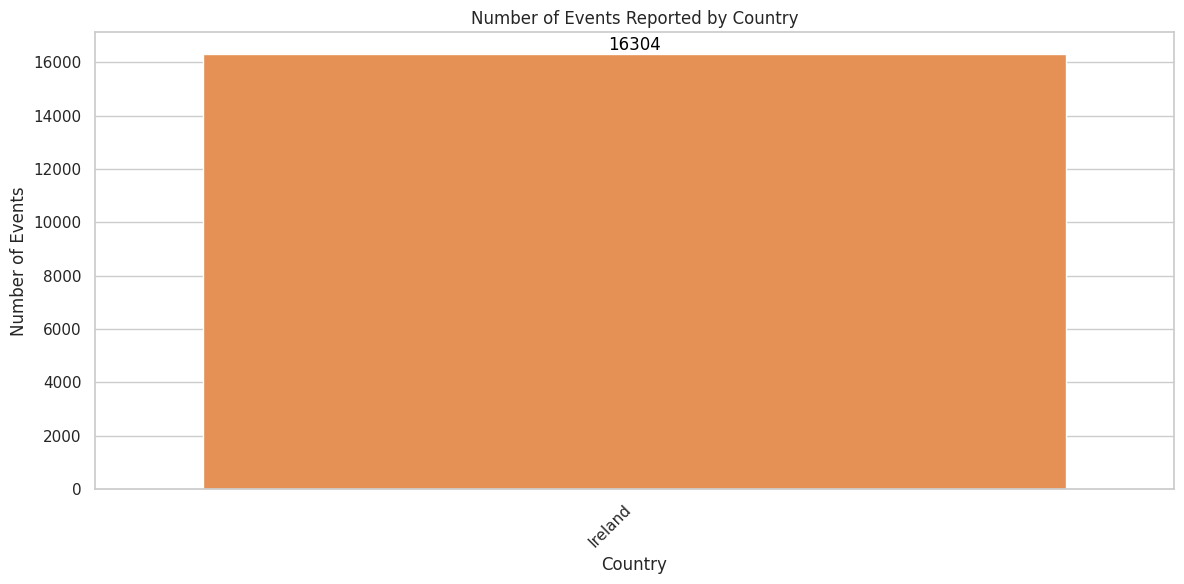

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_data.csv' with your actual CSV file path
df = pd.read_csv('/content/Avian Influenza (HPAI) (1).csv')

# Count occurrences per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number_of_Events'] # Renaming columns

plt.figure(figsize=(12, 6))
# Use the new dataframe with country counts for plotting
bar = sns.barplot(x='Country', y='Number_of_Events', data=country_counts, palette="YlOrRd")

# Add numeric labels on top of bars
# Note: Iterating through the plotting dataframe (country_counts)
for index, row in country_counts.iterrows():
    # Adjusting text position slightly above the bar
    bar.text(index, row.Number_of_Events + country_counts['Number_of_Events'].max() * 0.01, int(row.Number_of_Events), color='black', ha='center')


plt.title('Number of Events Reported by Country')
plt.ylabel('Number of Events')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right') # Rotate and align labels
plt.tight_layout()
plt.show()

Columns in df:
['_id', 'Scientific_Name', 'Common_Name', 'Date', 'Year', 'Month', 'Day', 'Time', 'Country', 'Country_State_County', 'State', 'County', 'Locality', 'Latitude', 'Longitude', 'Parent_Species', 'target_H5_HPAI']


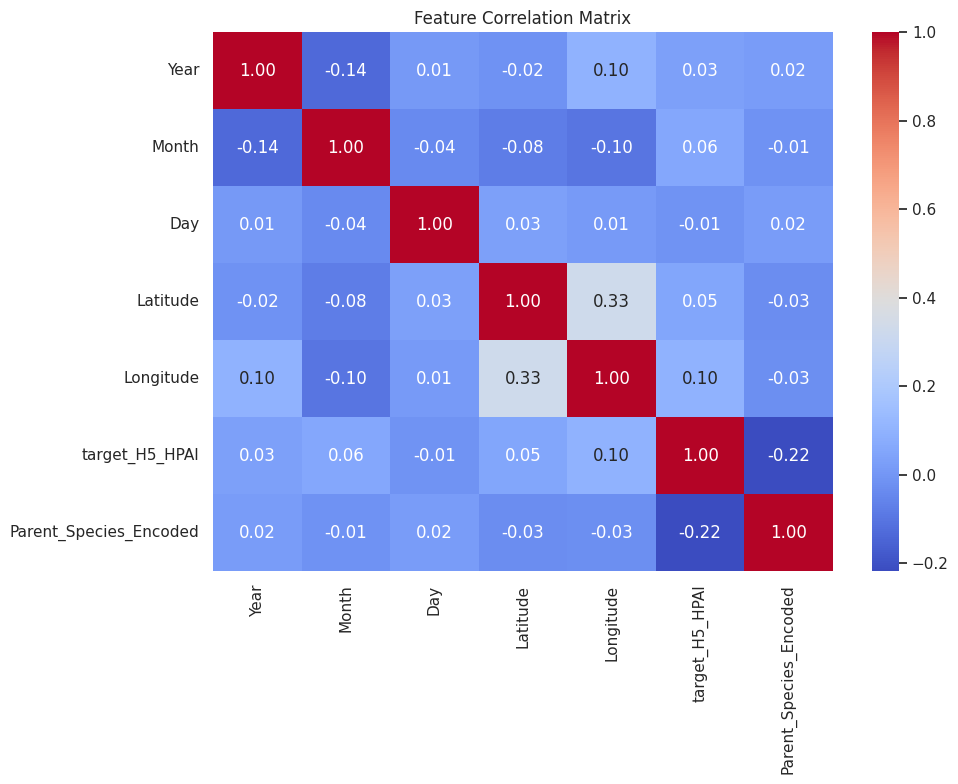

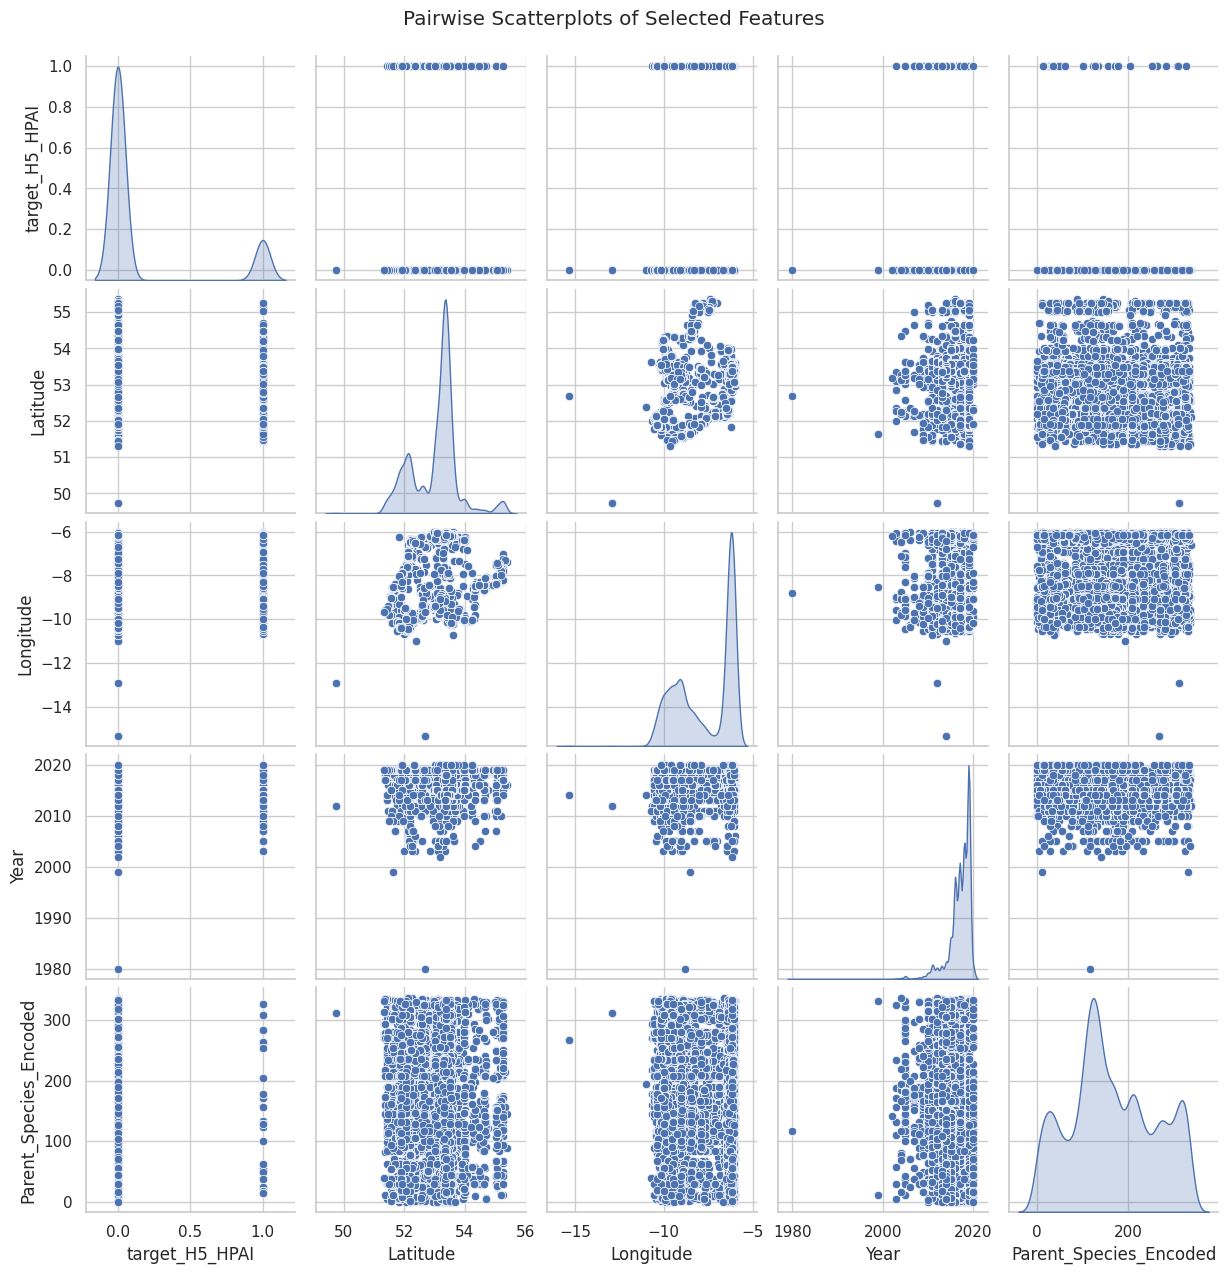

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Avian Influenza (HPAI) (1).csv')

# --- Added: Print column names to verify ---
print("Columns in df:")
print(df.columns.tolist())
# -------------------------------------------

# Select features for correlation (adjust column names as needed based on the printed list)
# Use existing columns from the dataset, e.g., 'Latitude', 'Longitude', 'Parent_Species', 'Year', 'Month', 'Day'

# Example: Use 'Parent_Species' which exists in the original dataset
# If 'target_H5_HPAI' is the target, you might want to include it as a numeric feature (it's 0 or 1)
# You might also want to use numerical columns like Year, Month, Day, Latitude, Longitude, and the target variable.

# Define features for correlation using actual column names from the dataset
# Assuming 'target_H5_HPAI', 'Year', 'Month', 'Day', 'Latitude', 'Longitude' and 'Parent_Species' are relevant.
# 'Parent_Species' is categorical, so we will encode it.

corr_features_to_use = ['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'target_H5_HPAI']

# Make a copy to avoid modifying the original df in place if other cells use it
df_corr = df[corr_features_to_use + ['Parent_Species']].copy()

# Encode 'Parent_Species'
df_corr['Parent_Species_Encoded'] = df_corr['Parent_Species'].astype('category').cat.codes

# Update the list of features for correlation matrix to include the encoded column
corr_features_matrix = corr_features_to_use + ['Parent_Species_Encoded']

# Calculate correlation matrix
# Ensure only numeric columns are used for correlation
corr_matrix = df_corr[corr_features_matrix].corr(numeric_only=True)


# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Pairwise scatterplots for a few interesting features
# Choose a subset of the features you used for the correlation matrix
top_features_for_pairplot = ['target_H5_HPAI', 'Latitude', 'Longitude', 'Year', 'Parent_Species_Encoded']

# Ensure selected features exist and are numeric (or encoded numeric)
sns.pairplot(df_corr[top_features_for_pairplot], kind='scatter', diag_kind='kde')
plt.suptitle('Pairwise Scatterplots of Selected Features', y=1.02)
plt.show()

PC1 explains 28.07% of variance
PC2 explains 21.70% of variance
Total variance explained by PC1 and PC2: 49.78%


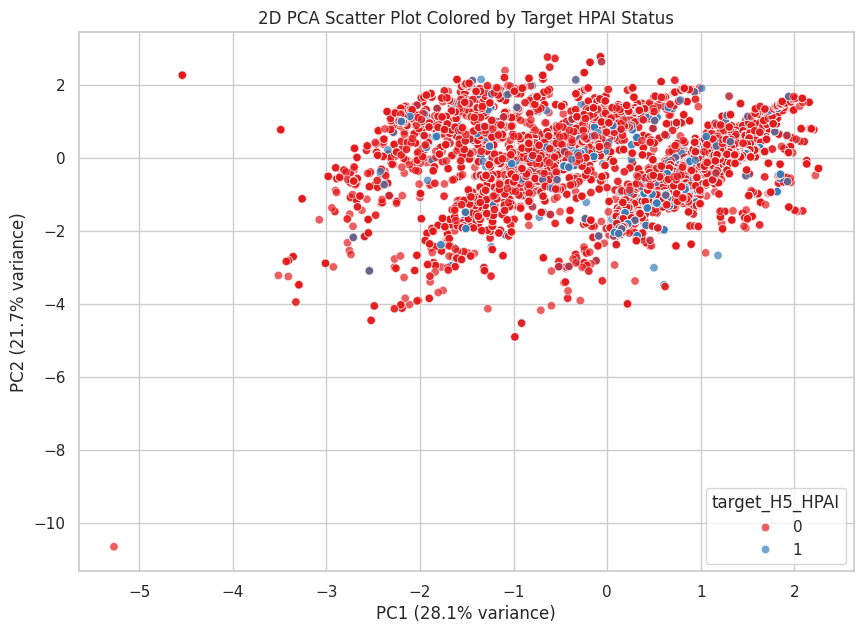

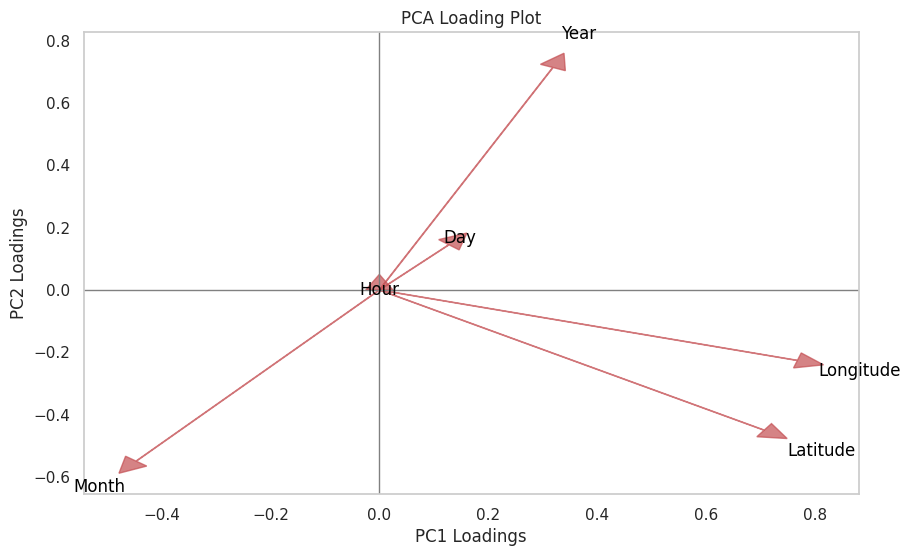

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/Avian Influenza (HPAI) (1).csv')

# --- Select actual continuous features from your DataFrame for PCA ---
# Based on the original columns and likely available numerical columns:
# 'Year', 'Month', 'Day', 'Latitude', 'Longitude' are present and numeric.
# 'Hour' was potentially calculated in a previous cell, let's check and add it if it exists.

# Add 'Hour' column if it was created in a previous cell
# Check if 'Hour' column exists before trying to use it for PCA
if 'Time' in df.columns:
    # Convert 'Time' column to hour of day (numeric) if it exists in the original df
    # Note: This recalculates 'Hour' which might be redundant if already done.
    # If 'Hour' column was reliably created and persisted in 'df' in a previous cell,
    # you might just check `if 'Hour' in df.columns:` and add it to `features`.
    # However, recalculating here ensures it's available for this cell's execution.
    df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
    # Drop rows with NaN hour values resulting from conversion issues
    df.dropna(subset=['Hour'], inplace=True)
    df.drop(columns=['Time'], inplace=True) # Drop original Time column

# Define features for PCA using actual columns
# Ensure these columns are numeric or become numeric (like 'Hour')
features = ['Year', 'Month', 'Day', 'Latitude', 'Longitude']
if 'Hour' in df.columns:
    features.append('Hour')

# Filter DataFrame to only include the selected features and handle potential NaNs
# (dropna was done for 'Hour', but check others if necessary)
df_pca = df[features].dropna().copy() # Use a copy to avoid SettingWithCopyWarning

# Extract features and scale
X = df_pca[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results back to the potentially filtered dataframe (df_pca) for plotting
df_pca['PC1'] = X_pca[:, 0]
df_pca['PC2'] = X_pca[:, 1]

# Add the column you want to use for coloring the scatter plot (e.g., 'target_H5_HPAI')
# Ensure this column is also in df_pca after potential dropping of rows
if 'target_H5_HPAI' in df.columns:
    # Merge or align the target column with the PCA results based on the index
    df_pca = df_pca.merge(df[['target_H5_HPAI']], left_index=True, right_index=True, how='left')
    color_hue = 'target_H5_HPAI'
else:
    # If 'target_H5_HPAI' isn't available, plot without color hue or choose another column
    color_hue = None
    print("Warning: 'target_H5_HPAI' column not found for coloring PCA plot.")


# Explained variance
print(f"PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"Total variance explained by PC1 and PC2: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Scatter plot colored by disease status (using the actual target variable)
plt.figure(figsize=(10, 7))
# Use the filtered/processed dataframe for plotting
if color_hue:
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=color_hue, palette='Set1', alpha=0.7)
    plt.legend(title=color_hue)
else:
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', alpha=0.7)

plt.title('2D PCA Scatter Plot Colored by Target HPAI Status')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.grid(True)
plt.show()

# Loading plot: contribution of each original feature to PC1 and PC2
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(10, 6))
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='r', alpha=0.7, head_width=0.05, head_length=0.05)
    # Adjust text position slightly
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, color='black', ha='center', va='center')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('PCA Loading Plot')
plt.grid()
plt.show()

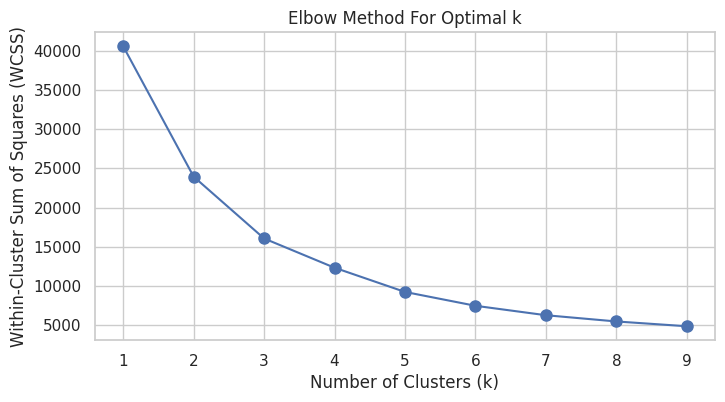

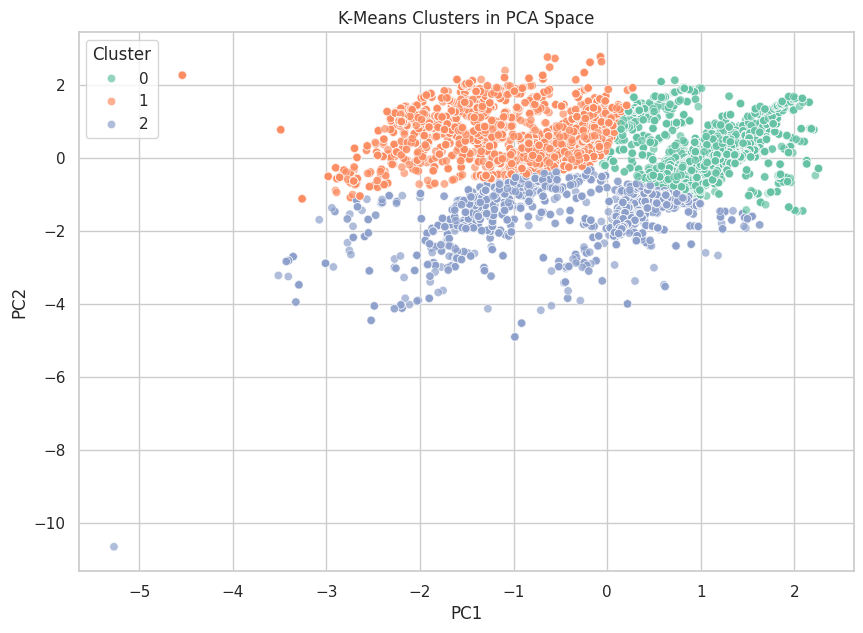

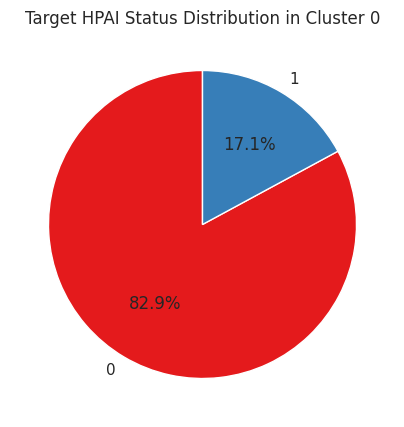

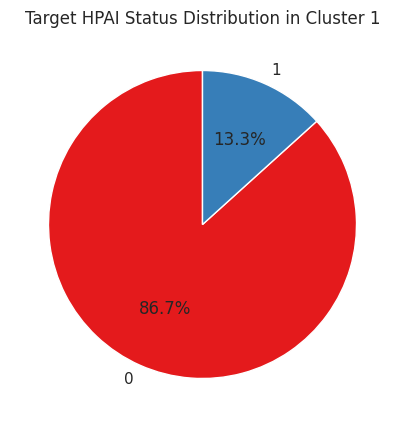

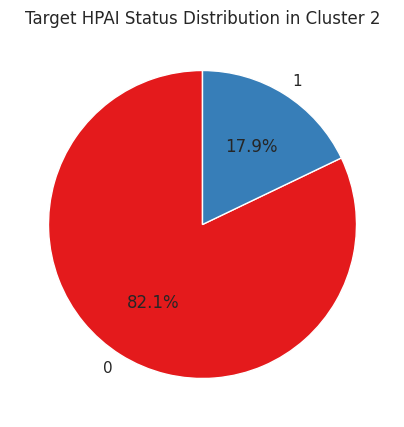

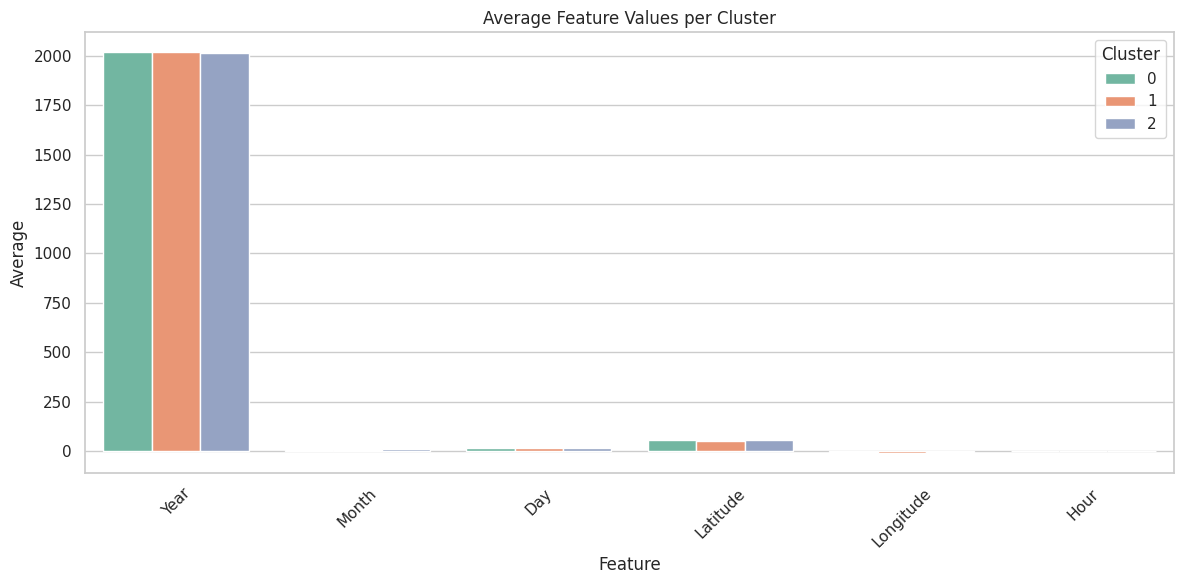

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('/content/Avian Influenza (HPAI) (1).csv')

# --- Select actual continuous features from your DataFrame for PCA and clustering ---
# Based on the available numeric columns in the dataset:
features_to_use = ['Year', 'Month', 'Day', 'Latitude', 'Longitude']

# Check if 'Time' column exists to potentially create 'Hour'
if 'Time' in df.columns:
    # Convert 'Time' column to hour of day (numeric)
    df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
    # Drop rows with NaN hour values resulting from conversion issues
    df.dropna(subset=['Hour'], inplace=True)
    df.drop(columns=['Time'], inplace=True) # Drop original Time column
    features_to_use.append('Hour') # Add Hour to the features list if created

# Filter DataFrame to only include the selected features and handle potential NaNs
# Using the list of features_to_use
df_clustering = df[features_to_use].dropna().copy() # Use a copy to avoid SettingWithCopyWarning

# Extract features and scale
X = df_clustering[features_to_use].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA transform to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results back to the filtered dataframe (df_clustering) for plotting
df_clustering['PC1'] = X_pca[:, 0]
df_clustering['PC2'] = X_pca[:, 1]

# ----------- Elbow Method to find optimal k -----------

wcss = []
K = range(1, 10)
for k in K:
    # Set n_init explicitly to suppress the warning
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# ----------- K-Means Clustering with k=3 (adjust k based on Elbow plot) -----------
# Let's proceed with k=3 as an example, but adjust if the Elbow plot suggests otherwise.
k = 3
# Set n_init explicitly to suppress the warning
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

df_clustering['Cluster'] = clusters

# ----------- Cluster scatter plot in PCA space -----------

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustering, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('K-Means Clusters in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ----------- Pie charts showing disease status breakdown per cluster -----------
# You might want to analyze the actual 'target_H5_HPAI' column instead of a placeholder.
# Ensure 'target_H5_HPAI' is available in df_clustering (e.g., by merging or ensuring it wasn't dropped)
# Since df_clustering is a subset of df after dropping rows with NaN in features_to_use,
# you might need to add 'target_H5_HPAI' back if you want to use it for the pie charts.
# A simpler approach is to merge the cluster labels back to the original df or a copy of it
# *before* dropping the rows for clustering if you want to use all original columns for analysis.

# Let's merge the cluster labels back to the original df based on the index
df_with_clusters = df.merge(df_clustering[['Cluster']], left_index=True, right_index=True, how='left')

# Now use the actual disease status column name from your dataset
disease_col = 'target_H5_HPAI' # Using the actual target column name

# Filter out rows where clustering failed (due to NaNs in features_to_use)
df_with_clusters_valid = df_with_clusters.dropna(subset=['Cluster'])

for cluster_id in range(k):
    # Ensure we only select data for the current cluster
    cluster_data = df_with_clusters_valid[df_with_clusters_valid['Cluster'] == cluster_id]
    if not cluster_data.empty:
        # Convert the cluster ID to integer for display if it's not already
        cluster_id_int = int(cluster_id)
        counts = cluster_data[disease_col].value_counts()
        plt.figure(figsize=(5, 5))
        # Ensure colors match the number of categories in 'counts'
        colors = sns.color_palette('Set1', len(counts))
        counts.plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
        plt.title(f'Target HPAI Status Distribution in Cluster {cluster_id_int}')
        plt.ylabel('')
        plt.show()
    else:
        print(f"No data points in Cluster {cluster_id}")


# ----------- Bar graph comparing average features per cluster -----------

# Calculate average features using the dataframe with clusters assigned
# Ensure only the features used for clustering are averaged
avg_features = df_with_clusters_valid.groupby('Cluster')[features_to_use].mean().reset_index()
avg_features_melted = avg_features.melt(id_vars='Cluster', var_name='Feature', value_name='Average')

plt.figure(figsize=(12, 6))
# Convert Cluster column to string or category for correct hue plotting
avg_features_melted['Cluster'] = avg_features_melted['Cluster'].astype(str)
sns.barplot(data=avg_features_melted, x='Feature', y='Average', hue='Cluster', palette='Set2')
plt.title('Average Feature Values per Cluster')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()